AIM: To analyse the documents in understanding the text, and the cleaning steps that may work with them.

In [1]:
import helper_analysis
import pandas as pd
import string
import re
from os import listdir
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

2022-10-16 12:07:48.962141: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-16 12:07:48.962170: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
# directory/file path
directory_particular_doc = 'Data/Raw/neg/cv000_29416.txt' # file address for one of the review document
directory_neg = 'Data/Raw/neg' # directory for positive sentiments
directory_pos = 'Data/Raw/pos' # directory for negative sentiments

Note: 
    Total Negative Reviews = 1000
    Total Positive Reviews = 1000
    -----------------------------
    Total Reviews Available = 2000

### Analysing a Review Document

In [3]:
# uploading a review document
doc = helper_analysis.load_doc(directory_particular_doc)
print('Review Document:\n', doc)

Review Document:
 plot : two teen couples go to a church party , drink and then drive . 
they get into an accident . 
one of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . 
what's the deal ? 
watch the movie and " sorta " find out . . . 
critique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . 
which is what makes this review an even harder one to write , since i generally applaud films which attempt to break the mold , mess with your head and such ( lost highway & memento ) , but there are good and bad ways of making all types of films , and these folks just didn't snag this one correctly . 
they seem to have taken this pretty neat concept , but executed it terribly . 
so what are the problems with the movie ? 
well , its main problem is that it's simply too jumbled . 
it starts off " normal " but then downshifts into this " fantasy " world in which you , as an audience m

> 1. Text is lowercase.
> 2. Presence of numbers, alphabets, and punctuations (,/().?!'"&).
> 3. Presence of stopwords.

In [4]:
# split into tokens by whitespace
tokens = doc.split()
print('Total tokens in this document: ', len(tokens))
print('Tokens:\n', tokens)

Total tokens in this document:  825
Tokens:
 ['plot', ':', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party', ',', 'drink', 'and', 'then', 'drive', '.', 'they', 'get', 'into', 'an', 'accident', '.', 'one', 'of', 'the', 'guys', 'dies', ',', 'but', 'his', 'girlfriend', 'continues', 'to', 'see', 'him', 'in', 'her', 'life', ',', 'and', 'has', 'nightmares', '.', "what's", 'the', 'deal', '?', 'watch', 'the', 'movie', 'and', '"', 'sorta', '"', 'find', 'out', '.', '.', '.', 'critique', ':', 'a', 'mind-fuck', 'movie', 'for', 'the', 'teen', 'generation', 'that', 'touches', 'on', 'a', 'very', 'cool', 'idea', ',', 'but', 'presents', 'it', 'in', 'a', 'very', 'bad', 'package', '.', 'which', 'is', 'what', 'makes', 'this', 'review', 'an', 'even', 'harder', 'one', 'to', 'write', ',', 'since', 'i', 'generally', 'applaud', 'films', 'which', 'attempt', 'to', 'break', 'the', 'mold', ',', 'mess', 'with', 'your', 'head', 'and', 'such', '(', 'lost', 'highway', '&', 'memento', ')', ',', 'but', 'ther

> 1. Total tokens after splitting by whitespace: 825.
> 2. Presence of punctuations.

In [5]:
# removing punction
re_punc = re.compile('[%s]' % re.escape(string.punctuation)) # prepare regex for char filtering
tokens = [re_punc.sub('', w) for w in tokens] # remove punctuation from each word
print('Total tokens in this document: ', len(tokens))
print('Tokens:\n', tokens)

Total tokens in this document:  825
Tokens:
 ['plot', '', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party', '', 'drink', 'and', 'then', 'drive', '', 'they', 'get', 'into', 'an', 'accident', '', 'one', 'of', 'the', 'guys', 'dies', '', 'but', 'his', 'girlfriend', 'continues', 'to', 'see', 'him', 'in', 'her', 'life', '', 'and', 'has', 'nightmares', '', 'whats', 'the', 'deal', '', 'watch', 'the', 'movie', 'and', '', 'sorta', '', 'find', 'out', '', '', '', 'critique', '', 'a', 'mindfuck', 'movie', 'for', 'the', 'teen', 'generation', 'that', 'touches', 'on', 'a', 'very', 'cool', 'idea', '', 'but', 'presents', 'it', 'in', 'a', 'very', 'bad', 'package', '', 'which', 'is', 'what', 'makes', 'this', 'review', 'an', 'even', 'harder', 'one', 'to', 'write', '', 'since', 'i', 'generally', 'applaud', 'films', 'which', 'attempt', 'to', 'break', 'the', 'mold', '', 'mess', 'with', 'your', 'head', 'and', 'such', '', 'lost', 'highway', '', 'memento', '', '', 'but', 'there', 'are', 'good', 'and'

> 1. Presence of empty items after removing punctuations.

In [6]:
# remove remaining tokens that are not alphabetic
tokens = [word for word in tokens if word.isalpha()]
print('Total tokens in this document: ', len(tokens))
print('Tokens:\n', tokens)

Total tokens in this document:  688
Tokens:
 ['plot', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party', 'drink', 'and', 'then', 'drive', 'they', 'get', 'into', 'an', 'accident', 'one', 'of', 'the', 'guys', 'dies', 'but', 'his', 'girlfriend', 'continues', 'to', 'see', 'him', 'in', 'her', 'life', 'and', 'has', 'nightmares', 'whats', 'the', 'deal', 'watch', 'the', 'movie', 'and', 'sorta', 'find', 'out', 'critique', 'a', 'mindfuck', 'movie', 'for', 'the', 'teen', 'generation', 'that', 'touches', 'on', 'a', 'very', 'cool', 'idea', 'but', 'presents', 'it', 'in', 'a', 'very', 'bad', 'package', 'which', 'is', 'what', 'makes', 'this', 'review', 'an', 'even', 'harder', 'one', 'to', 'write', 'since', 'i', 'generally', 'applaud', 'films', 'which', 'attempt', 'to', 'break', 'the', 'mold', 'mess', 'with', 'your', 'head', 'and', 'such', 'lost', 'highway', 'memento', 'but', 'there', 'are', 'good', 'and', 'bad', 'ways', 'of', 'making', 'all', 'types', 'of', 'films', 'and', 'these', 'folks',

> 1. 688 tokens present after removal of non-alphanumeric tokens.
> 2. Presence of stopwords.

In [7]:
# filter out stop words
stop_words = set(stopwords.words('english')) 
tokens = [w for w in tokens if not w in stop_words]
print('Total tokens in this document: ', len(tokens))
print('Tokens:\n', tokens)

Total tokens in this document:  330
Tokens:
 ['plot', 'two', 'teen', 'couples', 'go', 'church', 'party', 'drink', 'drive', 'get', 'accident', 'one', 'guys', 'dies', 'girlfriend', 'continues', 'see', 'life', 'nightmares', 'whats', 'deal', 'watch', 'movie', 'sorta', 'find', 'critique', 'mindfuck', 'movie', 'teen', 'generation', 'touches', 'cool', 'idea', 'presents', 'bad', 'package', 'makes', 'review', 'even', 'harder', 'one', 'write', 'since', 'generally', 'applaud', 'films', 'attempt', 'break', 'mold', 'mess', 'head', 'lost', 'highway', 'memento', 'good', 'bad', 'ways', 'making', 'types', 'films', 'folks', 'didnt', 'snag', 'one', 'correctly', 'seem', 'taken', 'pretty', 'neat', 'concept', 'executed', 'terribly', 'problems', 'movie', 'well', 'main', 'problem', 'simply', 'jumbled', 'starts', 'normal', 'downshifts', 'fantasy', 'world', 'audience', 'member', 'idea', 'whats', 'going', 'dreams', 'characters', 'coming', 'back', 'dead', 'others', 'look', 'like', 'dead', 'strange', 'apparitions'

> 1. After removal of stopwords, 330 tokens remaining.

### Wordcloud

In [8]:
wordcloud = WordCloud(stopwords = STOPWORDS,
                            background_color = 'black',
                            collocations=False,
                            width=500, height=350)

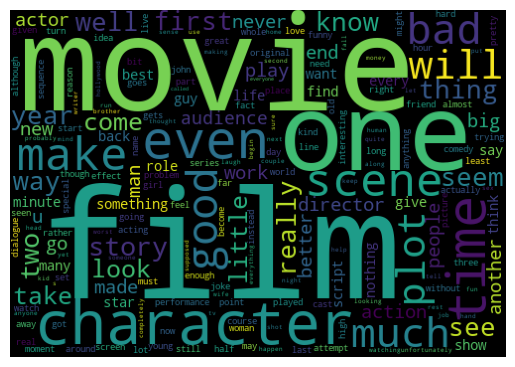

In [9]:
all_docs_neg = ""
for filename in listdir(directory_neg):
    path = directory_neg + '/' + filename
    doc = helper_analysis.load_doc(path)
    all_docs_neg = all_docs_neg + doc

wordcloud.generate(all_docs_neg)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

> Some negative words that are highlighted more: never, bad, memento, etc.


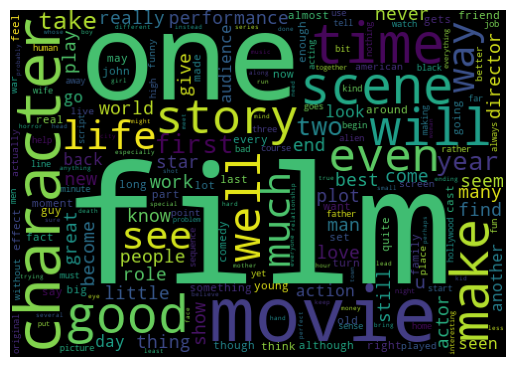

In [10]:
all_docs_pos = ""
for filename in listdir(directory_pos):
    path = directory_pos + '/' + filename
    doc = helper_analysis.load_doc(path)
    all_docs_pos = all_docs_pos + doc

wordcloud.generate(all_docs_pos)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

> Some positive words that are highlighted more: good, life, well, performance, great, etc.

Even though we have used a wordcloud for both type of sentiment documents; it's difficult to say which words influence a particular sentiment much as most of the highlighted words seem to be common in both. Also, words like film, or movie, or scene, or character, etc. that are highlighted in big may not tell much about the sentiment in general.